# week4_hw 東元電機財報文字探勘

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
plt.style.use('ggplot') 
% matplotlib inline

## 1. Defined reusable functions

In [7]:
# load file from given file name, will return a list
def open_file(file):
    with open(file + ".txt", encoding = "utf-8") as f:
        content = f.readlines()
        
        for i in range(len(content)):
            content[i] = content[i].strip()
            content[i] = content[i].replace(" ", "")
                
        #remove empty item
        content = list(filter(None, content))

    return(content)

In [8]:
def get_word_dic(content):
    join_text = ''.join(content)
    seg_list = jieba.cut(join_text, cut_all = False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopwords) :
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    return wordDict

In [9]:
def plot_cloud(wordDict):
    font = r"/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf"
    wordcloud = WordCloud(width=2000, height=1000, margin=2 , font_path=font)
    wordcloud.fit_words(wordDict)
    plt.figure(figsize = (12, 10))
    plt.grid(False)
    plt.imshow(wordcloud)

In [10]:
def plot_bar(wordDict):
    items = sorted(wordDict.items(), key = lambda x: x[1], reverse = True)[:10]
    keys = dict(items).keys() #top10_key
    print(keys)
    value = dict(items).values() #top10_value
    print(value)
    plt.figure(figsize = (10, 6))
    plt.bar(range(0,10), value)
    plt.xticks(range(0,10), keys, fontsize = 12)
    plt.ylabel('Frequency', fontsize = 20)
    plt.title("Top 10", fontsize = 20)
    plt.show()

## 2. Loaded stop words and proper noun

In [18]:
stopwords = ['我', '對', '(",")', '100', '100.00%', '-', '000', '1', '100%', '2', '0', '3', '4', '5', '6', '7', '8', '9', '有限公司', '東元', '電機', '公司', '長', '黃', '年', '度',
             '於', '/', 'V', '公司', '無', '或', '的', '及', '與', '$', '之', '對', '其他', '月', '日', '列', '利', "''", '之', '型', '為', '發', '於', '經授', '商字', '本', '在', '主要',
             '000100.00%', '集團', '查核', '107', '31', '準則', '企業', '致', '提供', '民國', '係', '市場', '30', '001', '第', '東元', '55030', '030', '5001', '305', '年度',
             '106', '105', '是否', '度', '小時', '等', '資訊', '情形', '會', '適用', '名稱', '500', '550', '100', '10', '堃', 'A', ',', '！', '？', '｡', '＂', '＃', '＄', '％', '＆', '＇',
             '（', '）', '＊', '＋', '，', '－', '／', '：', '；', '＜', '＝', '＞', '＠', '［', '＼', '］', '＾', '＿', '｀', '｛', '｜', '｝', '～', '｟', '｠', '｢', '｣', '､', '、', '〃', '》', '「',
             '」', '『', '』', '【', '】', '〔', '〕', '〖', '〗', '〘', '〙', '〚', '〛', '〜', '〝', '〞', '〟', '〰', '〾', '〿', '–', '—', '‘', '’', '‛', '“', '”', '„', '‟', '…', '‧', '﹏', '.', '。',
             "'", '(', ')', 'ˇ', '12', '金', '度', '率', '流', '林', '路', '股', '列', '力', '努力', '不', '衡量', '量', '冷', '冷凍', '致力', '備註', '註', '理', '建立', '設立', '轉增資',
             '認股權', '股數', '發行', '獨立', '信託', '公司治理', '執行', '啟用', '合資', '大型', '全球', '市場', '實務守則', '信息', '名稱', '元', '說明', '進行', '機率', '工具',
             '合併', '信託', '執行', '進行', '事項', '經營', '確定', '安台', '計價', '原因', '變化', '本年度', '交易', '既有', '項目', '本期', '衍伸', '股票', '事項', '比例', '所有',
             '持股', '認列', '服務', '說明', '關聯', '基金']
print(stopwords)
puncs = [',', '！', '？', '｡', '＂', '＃', '＄', '％', '＆', '＇', '（', '）', '＊', '＋', '，', '－', '／', '：', '；', '＜', '＝', '＞', '＠', '［', '＼', '］', '＾', '＿', '｀', '｛', '｜', '｝', '～', '｟', '｠', '｢', '｣', '､', '、', '〃', '》', '「', '」', '『', '』', '【', '】', '〔', '〕', '〖', '〗', '〘', '〙', '〚', '〛', '〜', '〝', '〞', '〟', '〰', '〾', '〿', '–', '—', '‘', '’', '‛', '“', '”', '„', '‟', '…', '‧', '﹏', '.', '。', "'", '(', ')', 'ˇ']
properN = open_file("ProperN")
print(properN)
for w in properN:
    jieba.add_word(w)

['我', '對', '(",")', '100', '100.00%', '-', '000', '1', '100%', '2', '0', '3', '4', '5', '6', '7', '8', '9', '有限公司', '東元', '電機', '公司', '長', '黃', '年', '度', '於', '/', 'V', '公司', '無', '或', '的', '及', '與', '$', '之', '對', '其他', '月', '日', '列', '利', "''", '之', '型', '為', '發', '於', '經授', '商字', '本', '在', '主要', '000100.00%', '集團', '查核', '107', '31', '準則', '企業', '致', '提供', '民國', '係', '市場', '30', '001', '第', '東元', '55030', '030', '5001', '305', '年度', '106', '105', '是否', '度', '小時', '等', '資訊', '情形', '會', '適用', '名稱', '500', '550', '100', '10', '堃', 'A', ',', '！', '？', '｡', '＂', '＃', '＄', '％', '＆', '＇', '（', '）', '＊', '＋', '，', '－', '／', '：', '；', '＜', '＝', '＞', '＠', '［', '＼', '］', '＾', '＿', '｀', '｛', '｜', '｝', '～', '｟', '｠', '｢', '｣', '､', '、', '〃', '》', '「', '」', '『', '』', '【', '】', '〔', '〕', '〖', '〗', '〘', '〙', '〚', '〛', '〜', '〝', '〞', '〟', '〰', '〾', '〿', '–', '—', '‘', '’', '‛', '“', '”', '„', '‟', '…', '‧', '﹏', '.', '。', "'", '(', ')', 'ˇ', '12', '金', '度', '率', '流', '林', '路', '股', '列', '力', '努力', '

## 3. Generated word cloud and top 10 frequent words bar chart for each chapter of TECO's financial statements

{'\ufeff': 1, '股東': 62, '大會': 1, '參': 2, '報告': 39, '一': 45, '組織': 11, '系統': 8, '薪酬': 3, '委員會': 31, '結構': 3, '稽核': 25, '小組': 9, '董事': 487, '審計委員會': 31, '綜合': 7, '企劃': 1, '中心': 14, '法': 18, '遵': 6, '暨': 32, '法務室': 5, '治': 144, '理': 395, '秘書室': 5, '董事長': 62, '人': 54, '力': 28, '資源': 8, '財務': 35, '暨管': 1, '安環小組': 1, '統購': 1, '資材': 1, 'IT': 1, '總經': 34, '室': 1, '健保': 1, '專案': 7, '品管': 1, '風能': 1, '前瞻': 2, '發展': 24, '智動化': 1, '綠': 7, '能': 11, '重電產': 2, '研家': 1, '電事業': 2, '部電': 2, '事業': 11, '控產': 1, '發機': 1, '電系統': 1, '研究所': 9, '生技': 3, '產研': 4, '部事業': 2, '部營': 1, '銷事業': 2, '部智': 1, '生產': 3, '行': 216, '品': 5, '研': 4, '製': 8, '中': 23, '工': 3, '營': 2, '設': 7, '高': 4, '壓': 2, '開': 3, '關': 19, '事': 13, '業': 3, '處': 23, '電': 7, '產': 1, '供': 5, '國': 3, '海': 1, '機': 4, '技': 1, '合': 8, '育成': 1, '杭': 1, '器具': 2, '智慧': 3, '品械空': 1, '調動產': 1, '銷品': 1, '應內外': 1, '電州': 1, '企保': 1, '保保壢': 1, '保壢': 1, '鏈技': 1, '研化': 1, '技劃業': 1, '發造': 1, '發發務': 1, '管備': 1, '發控發': 1, '管技術': 1, '發小術': 1, '一中': 1, '二中': 1, '發務展

dict_keys(['董事', '理', '行', '年', '治', '立', '度', '投資', '金', '利'])
dict_values([487, 395, 216, 214, 144, 136, 132, 105, 93, 83])


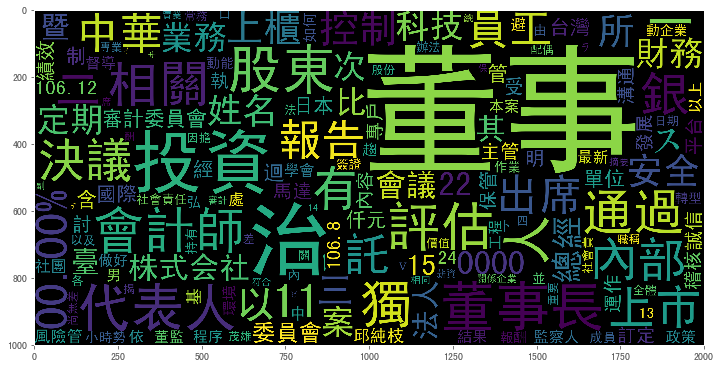

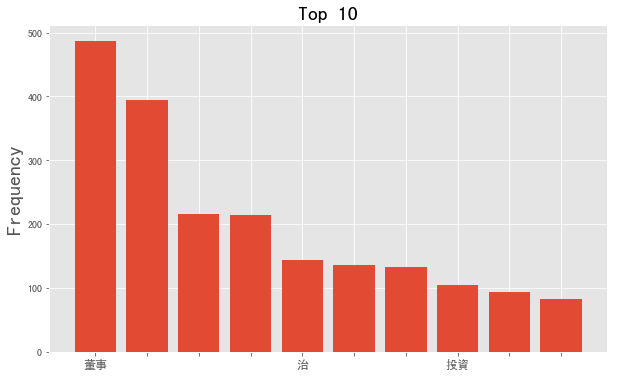

In [19]:
# 合併東元財報：壹、股東報告書 ＋ 貳、公司簡介 ＋ 參、公司治理報告
content3 = open_file("參公司治理報告")
wordDict3 = get_word_dic(content3)
print(wordDict3)
plot_cloud(wordDict3)
plot_bar(wordDict3)

dict_keys(['金', '行', '年', '增資', '員工', '轉換', '利', '公司債', '股本', '憑證'])
dict_values([64, 52, 50, 47, 46, 35, 31, 30, 25, 25])


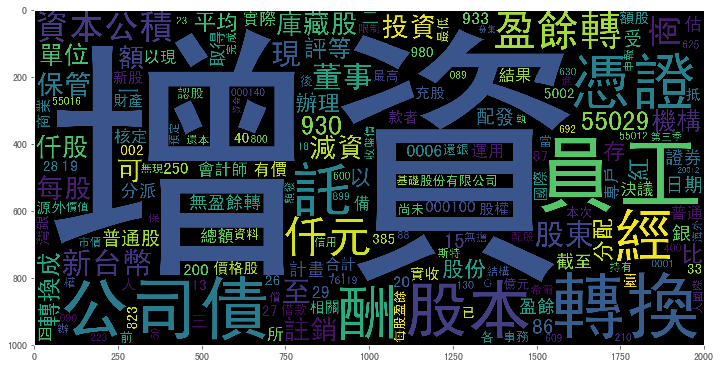

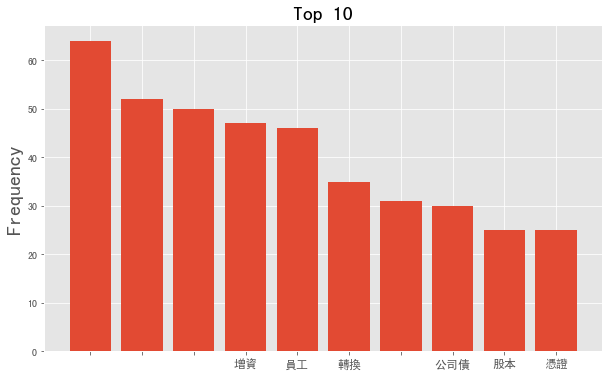

In [20]:
content4 = open_file("肆募集情形暨資金運用計畫執行情形")
wordDict4 = get_word_dic(content4)
plot_cloud(wordDict4)
plot_bar(wordDict4)

dict_keys(['馬達', '年', '力', '度', '產品', '員工', '利', '理', '冷', '開發'])
dict_values([88, 83, 58, 57, 57, 49, 48, 47, 43, 34])


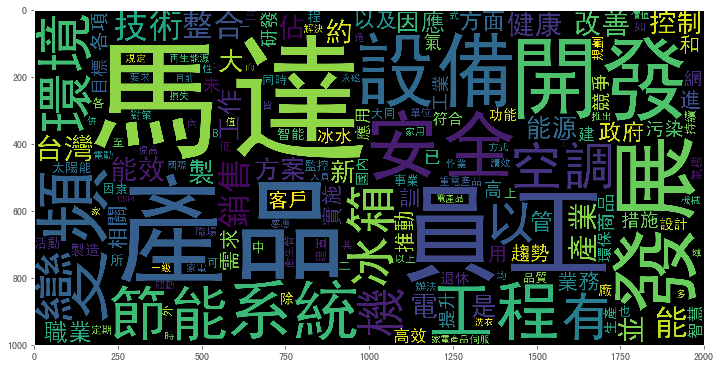

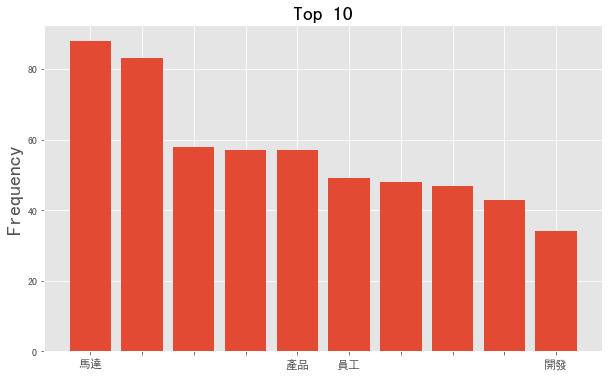

In [14]:
content5 = open_file("伍營運概況")
wordDict5 = get_word_dic(content5)
plot_cloud(wordDict5)
plot_bar(wordDict5)

dict_keys(['年', '金', '益', '資產', '列', '利', '度', '負債', '不', '融'])
dict_values([1179, 1085, 772, 627, 529, 492, 466, 361, 326, 320])


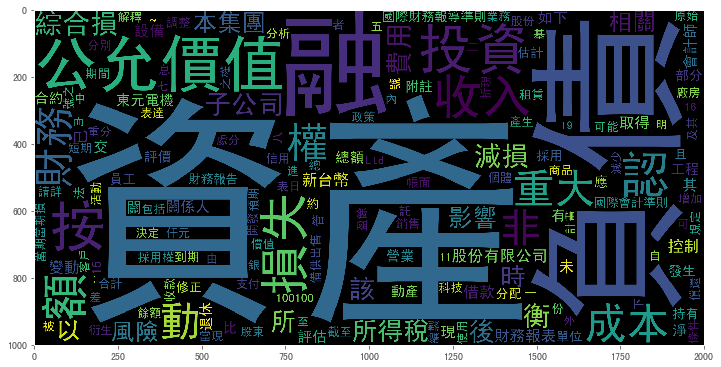

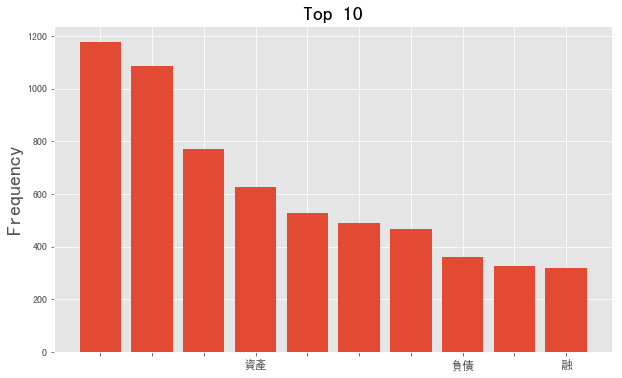

In [15]:
content6 = open_file("陸財務概況")
wordDict6 = get_word_dic(content6)
plot_cloud(wordDict6)
plot_bar(wordDict6)

dict_keys(['研發', '年', '金', '度', '技術', '馬達', '利', '益', '率', '流'])
dict_values([60, 47, 42, 39, 30, 29, 28, 24, 23, 21])


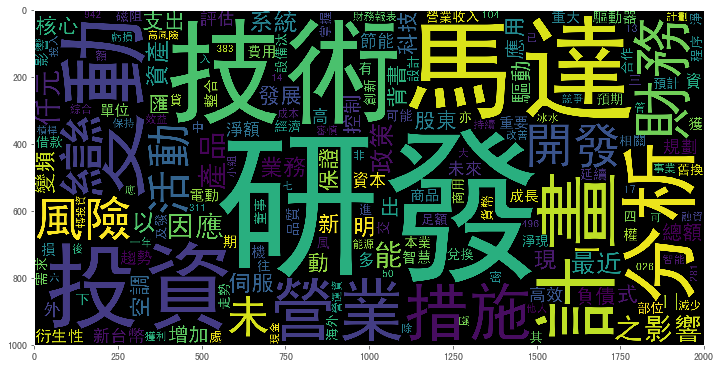

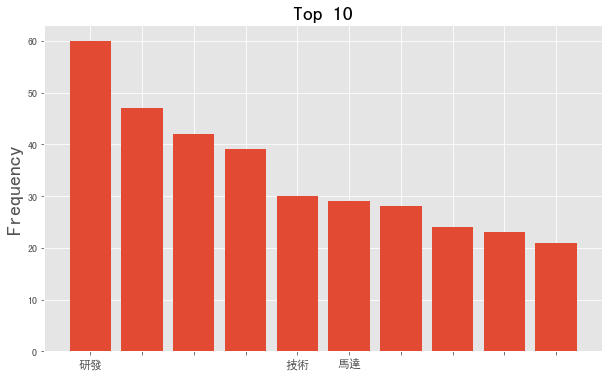

In [16]:
content7 = open_file("柒財務狀況及財務績效之檢討分析與風險事項")
wordDict7 = get_word_dic(content7)
plot_cloud(wordDict7)
plot_bar(wordDict7)

dict_keys(['董事', '東元電機', '董事長', '監察人', '投資', '科技', '邱純枝', '理', 'UVG', '開發'])
dict_values([436, 180, 107, 90, 73, 67, 54, 51, 50, 48])


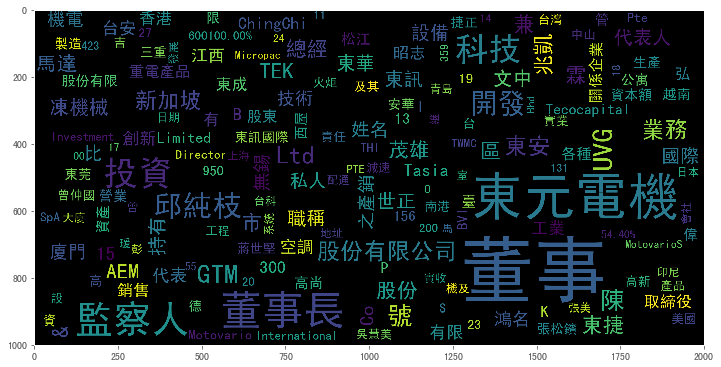

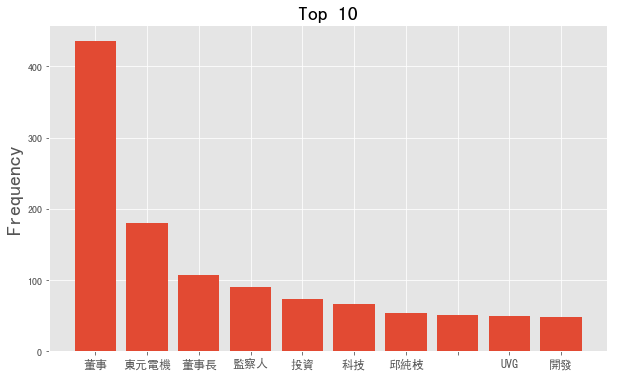

In [17]:
content8 = open_file("捌特別記載事項")
wordDict8 = get_word_dic(content8)
plot_cloud(wordDict8)
plot_bar(wordDict8)

## 4. 年報分析(以財報章節區分)：

### 肆、募集情形暨資金運用計畫執行情形

文字雲出現之關鍵字：盈餘轉，增資，憑證，認股權，員工

『盈餘轉，增資』：將盈餘轉增資方式發股票股利給股東。
『員工，認股權，憑證轉換』：員工行使認股權證。


### 伍、營運概況

文字雲出現之關鍵字：馬達，發展，空調，變頻，工程，空調，節能，環境，安全，系統，員工

『馬達，變頻』：機電類產品皆為製造馬達及變頻相關商品。
『發展，開發』：計畫開發新產品，例如：更高階之馬達，節能減碳家電商品等。
『節能，環境』：東元公司在節能及環境部分也蠻重視。
『員工，安全』：工作環境與員工人身安全的保護措施 。

### 柒、財務狀況及財務績效之檢討分析與風險事項

文字雲出現之關鍵字：研發、技術、馬達、投資

東元的成長依賴研發創新。近年來，彙集公司設於國內外各地研發單位之研發實力與市場經驗，並透過產學研合作， 加碼強化核心事業，積極投資綠能產業。 對於因應中長期新科技及新產品研發，及短期產品性價比改善的營運需求。且未來的發展產品依然是以馬達相關產品為主。

### 捌、特別記載事項

文字雲出現之關鍵字：董事、邱純枝、科技、投資、開發

滿多關係企業是東元100.00%所持有的，且以機械、科技產業相關，可以發現東元在投資相關企業的投資相當注重。而且都以其董事長邱純枝為代表居多。
而且其大部分的相關企業依然以監察人制為主，可能其公司規模、業務性質及其他必要情況，未達主管機關所強制要求的標準，需要設置審計委員會替代監察人。

### 結論
文字探勘技術應用在分析年報中，尚須輔助其他程式等等，以本次報告來說，文字圖雲對於初步分析非常簡略的了解，原因為操作上的不熟悉及其他輔助的應用程式尚未學習，導致使用探勘技術降低年報分析速度，但文字探勘技術未來使用上具有可行性，待技術成熟必能增加分析效率。